In [ ]:
import sys
sys.path.append('../src')

import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt

from cnn import load_model
from baselines import adversarial_train_and_save, evaluate_cnn_across_epsilons

In [39]:
data = loadmat('../data/processed/improved_signals.mat')
X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']
signal2_start_times = data['signal2_start_times'].squeeze()
print(f"Improved Test Set Shape: {X_test.shape}")

Improved Test Set Shape: (5628, 8, 500, 2)


## Define Epsilon Values

In [40]:
epsilon_values_inf = np.linspace(0.0, 0.005, 20)
epsilon_values_l2 = np.linspace(0.0, 0.05, 20)

In [41]:
epsilon_linf = epsilon_values_inf[4]
print(f"Selected epsilon values: Linf = {epsilon_linf}")

Selected epsilon values: Linf = 0.0010526315789473684


In [42]:
epsilon_l2 = epsilon_values_l2[4]
print(f"Selected epsilon values: L2 = {epsilon_l2}")

Selected epsilon values: L2 = 0.010526315789473684


## Adversarial Training

### FGSM Linf Norm

In [7]:
model_fgsm_linf = adversarial_train_and_save(
    X_train=X_train,
    y_train=y_train,
    epsilon=epsilon_linf,
    norm='inf',
    attack_type='fgsm',
    save_path='../models/attack/cnn_adv_fgsm_linf.h5',
    model_file='cnn',
    epochs=8
)

Model loaded from ../models/noattack/cnn.h5
Epoch 1/8
338/338 ━━━━━━━━━━━━━━━━━━━━ 18s 51ms/step - accuracy: 0.9005 - loss: 0.2756 - val_accuracy: 0.9350 - val_loss: 0.1826 - learning_rate: 1.0000e-04
Epoch 2/8
338/338 ━━━━━━━━━━━━━━━━━━━━ 15s 45ms/step - accuracy: 0.9363 - loss: 0.1765 - val_accuracy: 0.9381 - val_loss: 0.1710 - learning_rate: 1.0000e-04
Epoch 3/8
338/338 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.9432 - loss: 0.1606 - val_accuracy: 0.9417 - val_loss: 0.1580 - learning_rate: 1.0000e-04
Epoch 4/8
338/338 ━━━━━━━━━━━━━━━━━━━━ 16s 48ms/step - accuracy: 0.9444 - loss: 0.1549 - val_accuracy: 0.9446 - val_loss: 0.1489 - learning_rate: 1.0000e-04
Epoch 5/8
338/338 ━━━━━━━━━━━━━━━━━━━━ 17s 50ms/step - accuracy: 0.9503 - loss: 0.1446 - val_accuracy: 0.9485 - val_loss: 0.1437 - learning_rate: 1.0000e-04
Epoch 6/8
338/338 ━━━━━━━━━━━━━━━━━━━━ 15s 44ms/step - accuracy: 0.9522 - loss: 0.1383 - val_accuracy: 0.9463 - val_loss: 0.1421 - learning_rate: 1.0000e-04
Epoch 7/8
338/

Model saved at ../models/attack/cnn_adv_fgsm_linf.h5


In [8]:
test_loss, test_accuracy = model_fgsm_linf.evaluate(X_test, y_test)
print(f'CNN Test accuracy: {test_accuracy:.4f}')

176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9814 - loss: 0.0558
CNN Test accuracy: 0.9812


In [43]:
model_adv_fgsm_linf = load_model(model_name='cnn_adv_fgsm_linf', load_dir='../models/attack')

Model loaded from ../models/attack/cnn_adv_fgsm_linf.h5


### FGSM L2 Norm

In [10]:
model_fgsm_l2 = adversarial_train_and_save(
    X_train=X_train,
    y_train=y_train,
    epsilon=epsilon_l2,
    norm='2',
    attack_type='fgsm',
    save_path='../models/attack/cnn_adv_fgsm_l2.h5',
    epochs=8
)

Model loaded from ../models/noattack/cnn.h5
Epoch 1/8
338/338 ━━━━━━━━━━━━━━━━━━━━ 18s 51ms/step - accuracy: 0.9723 - loss: 0.0821 - val_accuracy: 0.9762 - val_loss: 0.0696 - learning_rate: 1.0000e-04
Epoch 2/8
338/338 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.9762 - loss: 0.0729 - val_accuracy: 0.9765 - val_loss: 0.0637 - learning_rate: 1.0000e-04
Epoch 3/8
338/338 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.9771 - loss: 0.0706 - val_accuracy: 0.9771 - val_loss: 0.0619 - learning_rate: 1.0000e-04
Epoch 4/8
338/338 ━━━━━━━━━━━━━━━━━━━━ 15s 44ms/step - accuracy: 0.9771 - loss: 0.0704 - val_accuracy: 0.9783 - val_loss: 0.0616 - learning_rate: 1.0000e-04
Epoch 5/8
338/338 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.9784 - loss: 0.0660 - val_accuracy: 0.9781 - val_loss: 0.0609 - learning_rate: 1.0000e-04
Epoch 6/8
338/338 ━━━━━━━━━━━━━━━━━━━━ 16s 48ms/step - accuracy: 0.9783 - loss: 0.0666 - val_accuracy: 0.9794 - val_loss: 0.0588 - learning_rate: 1.0000e-04
Epoch 7/8
338/

Model saved at ../models/attack/cnn_adv_fgsm_l2.h5


In [11]:
test_loss, test_accuracy = model_fgsm_l2.evaluate(X_test, y_test)
print(f'CNN Test accuracy: {test_accuracy:.4f}')

176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9877 - loss: 0.0404
CNN Test accuracy: 0.9876


In [44]:
model_adv_fgsm_l2 = load_model(model_name='cnn_adv_fgsm_l2', load_dir='../models/attack')

Model loaded from ../models/attack/cnn_adv_fgsm_l2.h5


### PGD Linf Norm

In [13]:
model_pgd_linf = adversarial_train_and_save(
    X_train=X_train,
    y_train=y_train,
    epsilon=epsilon_linf,
    norm='inf',
    attack_type='pgd',
    save_path='../models/attack/cnn_adv_pgd_linf.h5',
    epochs=8
)

Model loaded from ../models/noattack/cnn.h5
Epoch 1/8
338/338 ━━━━━━━━━━━━━━━━━━━━ 19s 50ms/step - accuracy: 0.8939 - loss: 0.2888 - val_accuracy: 0.9331 - val_loss: 0.1811 - learning_rate: 1.0000e-04
Epoch 2/8
338/338 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - accuracy: 0.9322 - loss: 0.1871 - val_accuracy: 0.9452 - val_loss: 0.1565 - learning_rate: 1.0000e-04
Epoch 3/8
338/338 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - accuracy: 0.9445 - loss: 0.1602 - val_accuracy: 0.9479 - val_loss: 0.1494 - learning_rate: 1.0000e-04
Epoch 4/8
338/338 ━━━━━━━━━━━━━━━━━━━━ 16s 48ms/step - accuracy: 0.9446 - loss: 0.1565 - val_accuracy: 0.9544 - val_loss: 0.1391 - learning_rate: 1.0000e-04
Epoch 5/8
338/338 ━━━━━━━━━━━━━━━━━━━━ 15s 44ms/step - accuracy: 0.9493 - loss: 0.1459 - val_accuracy: 0.9452 - val_loss: 0.1456 - learning_rate: 1.0000e-04
Epoch 6/8
338/338 ━━━━━━━━━━━━━━━━━━━━ 16s 48ms/step - accuracy: 0.9509 - loss: 0.1444 - val_accuracy: 0.9513 - val_loss: 0.1378 - learning_rate: 1.0000e-04
Epoch 7/8
338/

Model saved at ../models/attack/cnn_adv_pgd_linf.h5


In [14]:
test_loss, test_accuracy = model_pgd_linf.evaluate(X_test, y_test)
print(f'CNN Test accuracy: {test_accuracy:.4f}')

176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9829 - loss: 0.0559
CNN Test accuracy: 0.9831


In [45]:
model_adv_pgd_linf = load_model(model_name='cnn_adv_pgd_linf', load_dir='../models/attack')

Model loaded from ../models/attack/cnn_adv_pgd_linf.h5


### PGD L2 Norm

In [16]:
model_pgd_l2 = adversarial_train_and_save(
    X_train=X_train,
    y_train=y_train,
    epsilon=epsilon_l2,
    norm='2',
    attack_type='pgd',
    save_path='../models/attack/cnn_adv_pgd_l2.h5',
    epochs=10
)

Model loaded from ../models/noattack/cnn.h5
Epoch 1/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.9718 - loss: 0.0842 - val_accuracy: 0.9783 - val_loss: 0.0654 - learning_rate: 1.0000e-04
Epoch 2/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 15s 43ms/step - accuracy: 0.9760 - loss: 0.0745 - val_accuracy: 0.9804 - val_loss: 0.0614 - learning_rate: 1.0000e-04
Epoch 3/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 15s 44ms/step - accuracy: 0.9771 - loss: 0.0713 - val_accuracy: 0.9815 - val_loss: 0.0602 - learning_rate: 1.0000e-04
Epoch 4/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.9771 - loss: 0.0702 - val_accuracy: 0.9810 - val_loss: 0.0583 - learning_rate: 1.0000e-04
Epoch 5/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 17s 51ms/step - accuracy: 0.9778 - loss: 0.0687 - val_accuracy: 0.9823 - val_loss: 0.0601 - learning_rate: 1.0000e-04
Epoch 6/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 16s 48ms/step - accuracy: 0.9803 - loss: 0.0630 - val_accuracy: 0.9831 - val_loss: 0.0570 - learning_rate: 1.0000e-04
Epoch 7/

Model saved at ../models/attack/cnn_adv_pgd_l2.h5


In [17]:
test_loss, test_accuracy = model_pgd_l2.evaluate(X_test, y_test)
print(f'CNN Test accuracy: {test_accuracy:.4f}')

176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9876 - loss: 0.0398
CNN Test accuracy: 0.9870


In [46]:
model_adv_pgd_l2 = load_model(model_name='cnn_adv_pgd_l2', load_dir='../models/attack')

Model loaded from ../models/attack/cnn_adv_pgd_l2.h5


## Evaluate and Compare Results

In [19]:
fgsm_inf = pd.read_csv('../results/improved_attacks/fgsm_inf_accuracy.csv')
pgd_inf = pd.read_csv('../results/improved_attacks/pgd_inf_accuracy.csv')
fgsm_l2 = pd.read_csv('../results/improved_attacks/fgsm_l2_accuracy.csv')
pgd_l2 = pd.read_csv('../results/improved_attacks/pgd_l2_accuracy.csv')

In [20]:
# adversarial training
acc_adv_fgsm_inf, preds_adv_fgsm_inf = evaluate_cnn_across_epsilons(
    model_adv_fgsm_linf, X_test, y_test,
    epsilon_values_inf, attack_type='fgsm', norm='inf'
)

[FGSM-inf] Epsilon = 0.00000
Mean absolute perturbation at epsilon=0.00000: 0.000000
[FGSM-inf] Epsilon = 0.00026
Mean absolute perturbation at epsilon=0.00026: 0.000261
[FGSM-inf] Epsilon = 0.00053
Mean absolute perturbation at epsilon=0.00053: 0.000521
[FGSM-inf] Epsilon = 0.00079
Mean absolute perturbation at epsilon=0.00079: 0.000782
[FGSM-inf] Epsilon = 0.00105
Mean absolute perturbation at epsilon=0.00105: 0.001043
[FGSM-inf] Epsilon = 0.00132
Mean absolute perturbation at epsilon=0.00132: 0.001304
[FGSM-inf] Epsilon = 0.00158
Mean absolute perturbation at epsilon=0.00158: 0.001564
[FGSM-inf] Epsilon = 0.00184
Mean absolute perturbation at epsilon=0.00184: 0.001825
[FGSM-inf] Epsilon = 0.00211
Mean absolute perturbation at epsilon=0.00211: 0.002086
[FGSM-inf] Epsilon = 0.00237
Mean absolute perturbation at epsilon=0.00237: 0.002346
[FGSM-inf] Epsilon = 0.00263
Mean absolute perturbation at epsilon=0.00263: 0.002607
[FGSM-inf] Epsilon = 0.00289
Mean absolute perturbation at epsilo

In [21]:
fgsm_inf['adv_trained'] = acc_adv_fgsm_inf

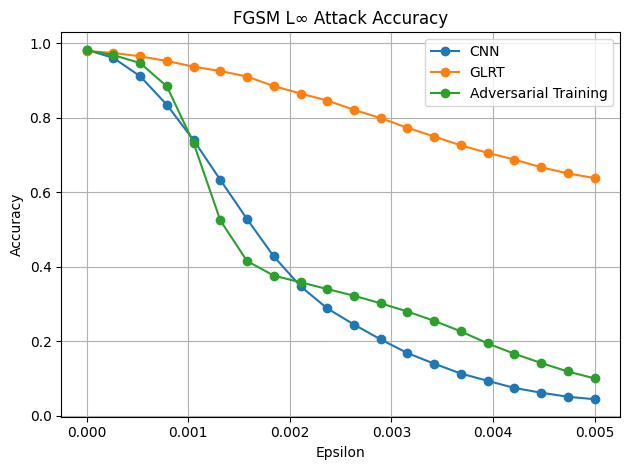

In [22]:
fgsm_inf.plot(
    x="epsilon",
    y=["cnn_accuracy", "glrt_accuracy", "adv_trained"],
    marker='o'
)

plt.title("FGSM L∞ Attack Accuracy")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend(["CNN", "GLRT", "Adversarial Training"])
plt.tight_layout()
plt.show()

In [47]:
fgsm_inf.to_csv('../results/baseline/fgsm_inf_accuracy_with_adv.csv', index=False)

In [32]:
# adversarial training
acc_adv_fgsm_l2, preds_adv_fgsm_l2 = evaluate_cnn_across_epsilons(
    model_adv_fgsm_l2, X_test, y_test,
    epsilon_values_l2, attack_type='fgsm', norm='2'
)

[FGSM-2] Epsilon = 0.00000
Mean absolute perturbation at epsilon=0.00000: 0.000000
[FGSM-2] Epsilon = 0.00263
Mean absolute perturbation at epsilon=0.00263: 0.000009
[FGSM-2] Epsilon = 0.00526
Mean absolute perturbation at epsilon=0.00526: 0.000018
[FGSM-2] Epsilon = 0.00789
Mean absolute perturbation at epsilon=0.00789: 0.000027
[FGSM-2] Epsilon = 0.01053
Mean absolute perturbation at epsilon=0.01053: 0.000037
[FGSM-2] Epsilon = 0.01316
Mean absolute perturbation at epsilon=0.01316: 0.000046
[FGSM-2] Epsilon = 0.01579
Mean absolute perturbation at epsilon=0.01579: 0.000055
[FGSM-2] Epsilon = 0.01842
Mean absolute perturbation at epsilon=0.01842: 0.000064
[FGSM-2] Epsilon = 0.02105
Mean absolute perturbation at epsilon=0.02105: 0.000073
[FGSM-2] Epsilon = 0.02368
Mean absolute perturbation at epsilon=0.02368: 0.000082
[FGSM-2] Epsilon = 0.02632
Mean absolute perturbation at epsilon=0.02632: 0.000091
[FGSM-2] Epsilon = 0.02895
Mean absolute perturbation at epsilon=0.02895: 0.000100
[FGS

In [33]:
fgsm_l2['adv_trained'] = acc_adv_fgsm_l2

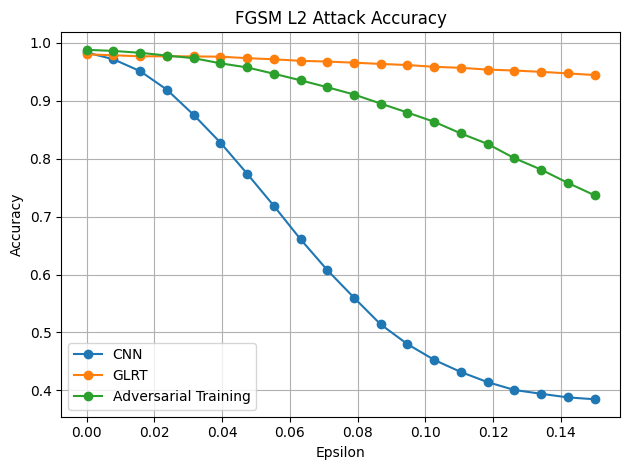

In [34]:
fgsm_l2.plot(
    x="epsilon",
    y=["cnn_accuracy", "glrt_accuracy", "adv_trained"],
    marker='o'
)

plt.title("FGSM L2 Attack Accuracy")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend(["CNN", "GLRT", "Adversarial Training"])
plt.tight_layout()
plt.show()

In [48]:
fgsm_l2.to_csv('../results/baseline/fgsm_l2_accuracy_with_adv.csv', index=False)

In [26]:
# distillation
acc_adv_pgd_inf, preds_adv_pgd_inf = evaluate_cnn_across_epsilons(
    model_adv_pgd_linf, X_test, y_test,
    epsilon_values_inf, attack_type='pgd', norm='inf'
)

[PGD-inf] Epsilon = 0.00000
Mean absolute perturbation at epsilon=0.00000: 0.000000
[PGD-inf] Epsilon = 0.00026
Mean absolute perturbation at epsilon=0.00026: 0.000252
[PGD-inf] Epsilon = 0.00053
Mean absolute perturbation at epsilon=0.00053: 0.000491
[PGD-inf] Epsilon = 0.00079
Mean absolute perturbation at epsilon=0.00079: 0.000720
[PGD-inf] Epsilon = 0.00105
Mean absolute perturbation at epsilon=0.00105: 0.000943
[PGD-inf] Epsilon = 0.00132
Mean absolute perturbation at epsilon=0.00132: 0.001163
[PGD-inf] Epsilon = 0.00158
Mean absolute perturbation at epsilon=0.00158: 0.001380
[PGD-inf] Epsilon = 0.00184
Mean absolute perturbation at epsilon=0.00184: 0.001595
[PGD-inf] Epsilon = 0.00211
Mean absolute perturbation at epsilon=0.00211: 0.001807
[PGD-inf] Epsilon = 0.00237
Mean absolute perturbation at epsilon=0.00237: 0.002016
[PGD-inf] Epsilon = 0.00263
Mean absolute perturbation at epsilon=0.00263: 0.002221
[PGD-inf] Epsilon = 0.00289
Mean absolute perturbation at epsilon=0.00289: 0

In [27]:
pgd_inf['adv_trained'] = acc_adv_pgd_inf

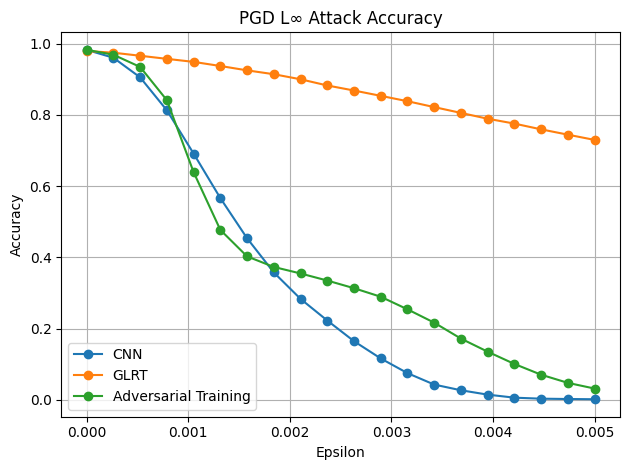

In [28]:
pgd_inf.plot(
    x="epsilon",
    y=["cnn_accuracy", "glrt_accuracy", "adv_trained"],
    marker='o'
)

plt.title("PGD L∞ Attack Accuracy")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend(["CNN", "GLRT", "Adversarial Training"])
plt.tight_layout()
plt.show()

In [49]:
pgd_inf.to_csv('../results/baseline/pgd_inf_accuracy_with_adv.csv', index=False)

In [35]:
# distillation
acc_adv_pgd_l2, preds_adv_pgd_l2 = evaluate_cnn_across_epsilons(
    model_adv_pgd_l2, X_test, y_test,
    epsilon_values_l2, attack_type='pgd', norm='2'
)

[PGD-2] Epsilon = 0.00000
Mean absolute perturbation at epsilon=0.00000: 0.000000
[PGD-2] Epsilon = 0.00263
Mean absolute perturbation at epsilon=0.00263: 0.000009
[PGD-2] Epsilon = 0.00526
Mean absolute perturbation at epsilon=0.00526: 0.000018
[PGD-2] Epsilon = 0.00789
Mean absolute perturbation at epsilon=0.00789: 0.000027
[PGD-2] Epsilon = 0.01053
Mean absolute perturbation at epsilon=0.01053: 0.000036
[PGD-2] Epsilon = 0.01316
Mean absolute perturbation at epsilon=0.01316: 0.000046
[PGD-2] Epsilon = 0.01579
Mean absolute perturbation at epsilon=0.01579: 0.000055
[PGD-2] Epsilon = 0.01842
Mean absolute perturbation at epsilon=0.01842: 0.000064
[PGD-2] Epsilon = 0.02105
Mean absolute perturbation at epsilon=0.02105: 0.000073
[PGD-2] Epsilon = 0.02368
Mean absolute perturbation at epsilon=0.02368: 0.000082
[PGD-2] Epsilon = 0.02632
Mean absolute perturbation at epsilon=0.02632: 0.000091
[PGD-2] Epsilon = 0.02895
Mean absolute perturbation at epsilon=0.02895: 0.000100
[PGD-2] Epsilon 

In [36]:
pgd_l2['adv_trained'] = acc_adv_pgd_l2

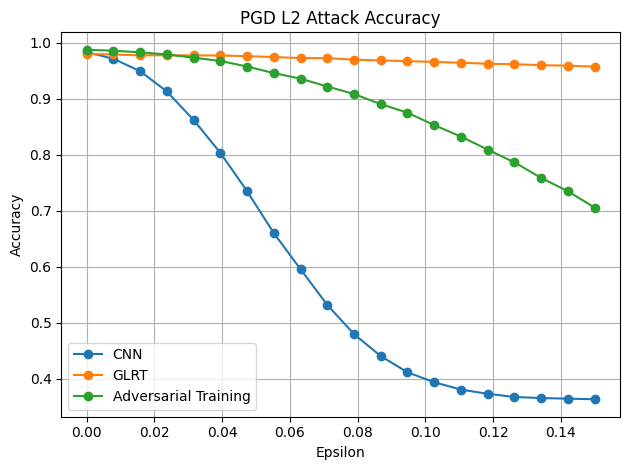

In [37]:
pgd_l2.plot(
    x="epsilon",
    y=["cnn_accuracy", "glrt_accuracy", "adv_trained"],
    marker='o'
)

plt.title("PGD L2 Attack Accuracy")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend(["CNN", "GLRT", "Adversarial Training"])
plt.tight_layout()
plt.show()

In [50]:
pgd_l2.to_csv('../results/baseline/pgd_l2_accuracy_with_adv.csv', index=False)